<a href="https://colab.research.google.com/github/HHansi/Applied-AI-Course/blob/main/Image%20Processing/Image_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import zipfile
with zipfile.ZipFile("/content/sample_images.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

In [65]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from skimage.filters import prewitt_h, prewitt_v, prewitt, sobel_h, sobel_v, sobel
from skimage.feature import hog

# Image Vectorisation

Converting matrix to an array or vector.

height, width, channels: (434, 296, 3)


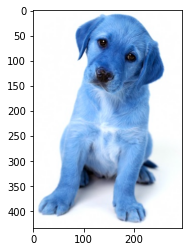

In [66]:
img = cv2.imread("/content/sample_images/puppy.jpg")

print(f'height, width, channels: {img.shape}')

plt.imshow(img)

In [68]:
# vectorise colour image
vector = img.flatten()
print(f'length of feature vector: {len(vector)}')

length of feature vector: 385392


In [69]:
# vectorise grayscaled image
img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

vector = img_grayscaled.flatten()
print(f'length of feature vector: {len(vector)}')

length of feature vector: 128464


# Edge Detection

## Prewitt Transform

Find the horizontal edges using Prewitt transform. 

Refer the [documentation](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.prewitt_h) for more details. 

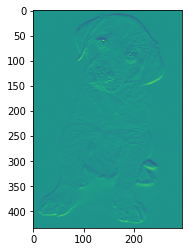

In [70]:
edges_prewitt_h = prewitt_h(img_grayscaled)  # 2D image need to be inserted as the input
plt.imshow(edges_prewitt_h)

Find the vertical edges using Prewitt transform.

Refer the [documentation](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.prewitt_v) for more details.

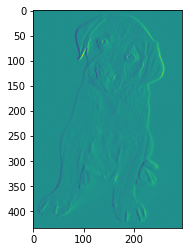

In [71]:
edges_prewitt_v = prewitt_v(img_grayscaled)
plt.imshow(edges_prewitt_v)

Find edges using Prewitt transform.

Refer the [documentation](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.prewitt) for more details.

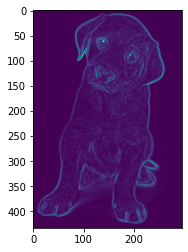

In [73]:
edges_prewitt = prewitt(img_grayscaled)
plt.imshow(edges_prewitt)

## Sobel Transform

Similar to Prewitt transform, both horizontal and vertical edges can be extracted using the functions: <i>sobel_h</i> and <i>sobel_v</i>. Refer the following documentation for more details about these functions.
- [sobel_h](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.sobel_h)
- [sobel_v](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.sobel_v)
- [sobel](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.sobel)



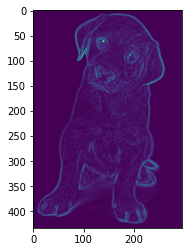

In [81]:
edges_sobel = sobel(img_grayscaled)  # 2D image need to be inserted as the input
plt.imshow(edges_sobel)

## Canny Edge Detector

Refer this [tutorial](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html) for more details. 

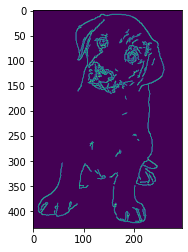

In [82]:
edges_canny = cv2.Canny(img_grayscaled, 100, 200) 
plt.imshow(edges_canny)

# HOG Feature Descriptor

The HOG feature descriptor counts the occurrences of gradient orientation in localised portions of an image as features.

Refer the [documentation](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog) for more details about <i>hog</i> function. 

height, width, channels: (434, 296, 3)
height, width, channels: (128, 64, 3)
length of feature vector: 3780


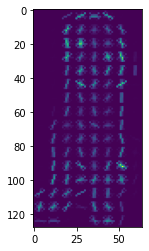

In [83]:
# Check image size
print(f'height, width, channels: {img.shape}')

# Resize image if necessary
img_resized = cv2.resize(img, (64, 128), interpolation=cv2.INTER_CUBIC)
print(f'height, width, channels: {img_resized.shape}')
plt.imshow(img_resized)

# Get HOG features
fd, hog_image = hog(img_resized, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
print(f'length of feature vector: {len(fd)}')
plt.imshow(hog_image)


# Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique which uses Singular Value Decomposition of the data to project it to a lower dimensional space.

Refer the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) of <i>PCA</i> for more details. 
Also, this [tutorial](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60) explains how to use PCA with machine learning models. 

In [84]:
import numpy as np
from sklearn.decomposition import PCA

In [85]:
# Define an array to use with PCA
X = np.array([[-1, -1, 1], [-2, -1, -1], [-3, -2, -1], [1, 1, 2], [2, 1, 0], [3, 2, 2]])
print(f'Shape of original data: {X.shape}')

pca = PCA(n_components=2)
pca.fit(X)

X_new = pca.transform(X)
print(f'Shape of transformed data: {X_new.shape}')
print(f'Transformed data:\n {X_new}')

Shape of original data: (6, 3)
Shape of transformed data: (6, 2)
Transformed data:
 [[ 1.09846548 -0.96442861]
 [ 2.62012346  0.55337181]
 [ 3.90461936  0.05254945]
 [-1.84258717 -0.88999636]
 [-1.87600176  1.30105315]
 [-3.90461936 -0.05254945]]
